In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

beer = pd.read_csv("E:\\project\\python\\machineLearning\ML_BeiFeng\\data\\beer_data.txt", sep=" ")
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [10]:
X = beer[["calories", "sodium", "alcohol", "cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [11]:
from sklearn.cluster import KMeans

k_means_2 = KMeans(n_clusters=2).fit(X)
k_means_3 = KMeans(n_clusters=3).fit(X)

In [13]:
k_means_3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [15]:
beer["cluster2"] = k_means_2.labels_
beer["cluster3"] = k_means_3.labels_
beer.sort_values("cluster2")

,name,calories,sodium,alcohol,cost,cluster2,cluster3
9,Budweiser_Light,113,8,3.7,0.40,0,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,2
11,Coors_Light,102,15,4.1,0.46,0,1
18,Olympia_Goled_Light,72,6,2.9,0.46,0,2
8,Miller_Lite,99,10,4.3,0.43,0,1
19,Schlitz_Light,97,7,4.2,0.47,0,1
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0
4,Heineken,152,11,5.0,0.77,1,0
3,Kronenbourg,170,7,5.2,0.73,1,0


In [16]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [17]:
beer.groupby("cluster3").mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,102.75,10.0,4.075000,0.440000,0
2,70.00,10.5,2.600000,0.420000,0


In [26]:
centers = beer.groupby("cluster2").mean().reset_index()

Text(0, 0.5, 'Alcohol')

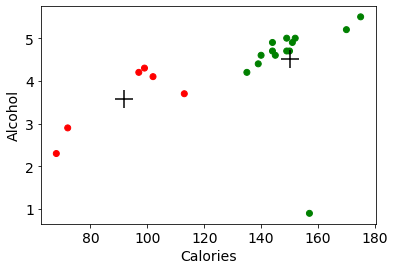

In [30]:
%matplotlib inline

cluster_centers = k_means_2.cluster_centers_

cluster_centers_2 = k_means_3.cluster_centers_

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster2"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [32]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [33]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster2,cluster3,scaled_cluster
0,Budweiser,144,15,4.7,0.43,1,0,0
1,Schlitz,151,19,4.9,0.43,1,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,1,0,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0,0
6,Augsberger,175,24,5.5,0.40,1,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0,0
16,Hamms,139,19,4.4,0.43,1,0,0
10,Coors,140,18,4.6,0.44,1,0,0
3,Kronenbourg,170,7,5.2,0.73,1,0,1
4,Heineken,152,11,5.0,0.77,1,0,1


In [34]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster2,cluster3
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,1.00,0.0
1,155.250,10.750,4.9750,0.7625,1.00,0.0
2,105.375,10.875,3.3250,0.4475,0.25,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E9398B2C8>,
      dtype=object)

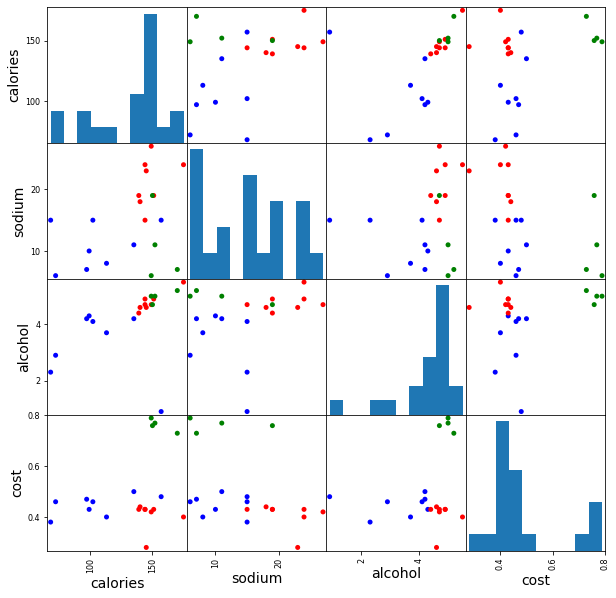

In [36]:
pd.plotting.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

In [38]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [39]:
labels = db.labels_

In [40]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster2,cluster3,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,0,1,2,-1
3,Kronenbourg,170,7,5.2,0.73,1,0,1,-1
6,Augsberger,175,24,5.5,0.40,1,0,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,0,0,0
16,Hamms,139,19,4.4,0.43,1,0,0,0
14,Kirin,149,6,5.0,0.79,1,0,1,0
13,Becks,150,19,4.7,0.76,1,0,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0,2,0
10,Coors,140,18,4.6,0.44,1,0,0,0
0,Budweiser,144,15,4.7,0.43,1,0,0,0


In [41]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster2,cluster3,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.333333,1.000000
0,146.250000,17.250000,4.383333,0.513333,1.000000,0.000000,0.583333
1,99.333333,10.666667,4.200000,0.453333,0.000000,1.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,0.000000,2.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E98359188>,
      dtype=object)

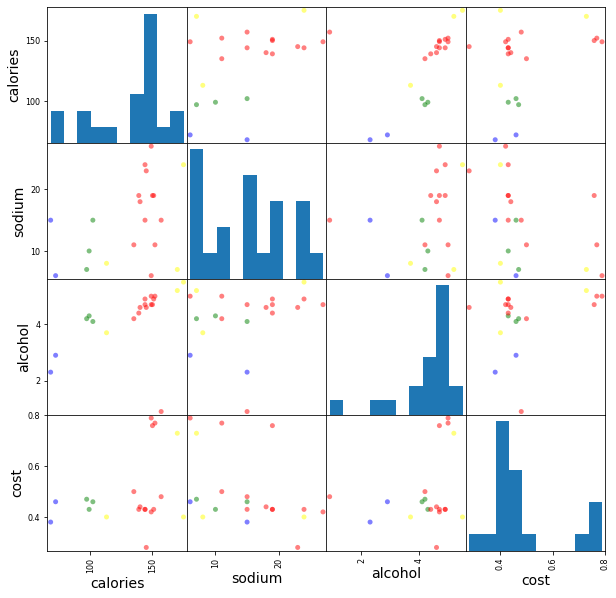

In [42]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)